## Neural Networks

Neural networks are one of the earliest examples of a machine learning model. Neural networks were initially introduced in the 1940s and have risen and fallen several times from popularity. The current generation of deep learning begain in 2006 with an improved training algorithm by Geoffrey Hinton.

![Perceptron](resources/images/M_1/and_or.png)

In 1969, in their book [Perceptrons](https://mitpress.mit.edu/books/perceptrons) Marvin Minksy and Seymour Papert demonstrate the limitations of perceptrons to solve only **_"linearly separable"_** problems.

#### XOR
![Perceptron](resources/images/M_1/xor.png)


Can we draw a single line through here to devide the T & F?? We can not. The point is this is not leniarly seperable data. We could draw two lines the T's are inside the two lines and the F's resides outside.

What is XOR actually? XOR is actually or but not AND.

lets say, we have a perceptron that can perform !AND operation. What if, we take the same inputs and send them to another perceptron which can solve OR. Taking both the outputs and by sending them to aother perceptron that can solve AND, we can produce the XOR output.

So the idea is, more complex problems that are not linearly seperable can be solved by linking multiple perceptrons.
they are also known as multi layer perceptron or neural networks.

The figure shows a three layer neural network. The layers are input, hidden and output. The input layers take the input (in case of XOR the inputs can be (0,0), (0,1), (1,0) or (1,1)) and the output layer produces output (1 or 0). The hidden layer contains the neurons that sit between input and output layer. They are reffered to as hidden because as a user of the system you don't necessarely see them. Inside this hidden layer where the magic happens ! Hidden layer allows us to get around this linearly seperable question. The more hidden layers, the more neurons - gives us more parameters to play with more complex problems.

![Perceptron](resources/images/M_1/nn2layer.png)


Each input neuron ($x_1$ and $x_2$) is connected to each neuron ($h_1$ and $h_2$) of the hidden layer. Each hidden neuron ($h_1$ and $h_2$) is connected to each output neuron ($O$). All these connections has a weight ($W_{ij}$).

We can compute the values for each neuron:

$$
\begin{split}
h_1 & = W_{11} * x_1 + W_{12} * x_2 + b_1\\
h_2 & = W_{21} * x_1 + W_{22} * x_2 + b_2\\
O & = W_{01} * h_1 + W_{02} * h_2 + b_0\\
\end{split}
$$

What feels normal is that, there is all these connections. We can write some for loop and compute the values for each node/neuron. Remember that inside the neuron weighted sum is calculated with each connection and it's corrosponding input value. Then the result is passed through some activation function - which is the output of that neuron.

#### The power of representation

Inputs come in, you can calculate the weighted sum of all the neurons for the next layer. That can be done in a single operation if the inputs and the weights are represented as matrix form in our code.

$$
\begin{split}
\begin{bmatrix} W_{11} & W_{12} \\ W_{21} & W_{22} \end{bmatrix}
\begin{bmatrix} x_1 \\ x_2  \end{bmatrix}
& =
\begin{bmatrix}  W_{11} * x_1 + W_{12} * x_2 \\  W_{21} * x_1 + W_{22} * x_2 \end{bmatrix} \\
& \Rightarrow
\begin{bmatrix}  W_{11} * x_1 + W_{12} * x_2 \\  W_{21} * x_1 + W_{22} * x_2 \end{bmatrix}
+ \begin{bmatrix} b_1 \\ b_2  \end{bmatrix}\\
 & =
\begin{bmatrix} h_1 \\ h_2  \end{bmatrix}
\end{split}
$$


### Feed Forward Network

The inputs come in, you take the weighted sum, add the bias, and finally pass it through the activation function. That results feed forward through the network and gets to the out put.

So we can write the generalized form for calculating the weight matrix of hidden and output.
$$ H = \sigma( W^{HI}_{ij}I + b^{H}) $$
$$ O = \sigma( W^{OH}_{ij}H + b^{O}) $$




### Backpropagation

![Perceptron](resources/images/M_1/err_update1.png)

$$ E_{h_1} = \dfrac{W_1}{W_1 + W_2} \times E_O $$

$$ E_{h_2} = \dfrac{W_2}{W_1 + W_2} \times E_O $$

![Perceptron](resources/images/M_1/err_update2.png)

$$ E_{h_1} = \dfrac{W_{11}}{W_{11} + W_{12}} \times E_{O_1} + \dfrac{W_{21}}{W_{21} + W_{22}} \times E_{O_2} $$

$$ E_{h_2} = \dfrac{W_{12}}{W_{11} + W_{12}} \times E_{O_1} + \dfrac{W_{22}}{W_{21} + W_{22}} \times E_{O_2} $$


Remember from perceptron :

$$ Y = mX+b $$

$$ \Delta m = \alpha \times E \times X $$

$$ \Delta b = \alpha \times E $$

Now, we have:

![Perceptron](resources/images/M_1/err_update3.png)

$$ Y = \sigma(WX + b) $$

$$ \Delta W^{OH}_{ij} = \alpha \times E_O \times (O \times (1-O)) \bullet H^T $$

$$ \Delta W^{HI}_{ij} = \alpha \times E_H \times (H \times (1-H)) \bullet I^T $$



<ipython-input-9-5635470eea11>:31: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.get_cmap('viridis', 5))


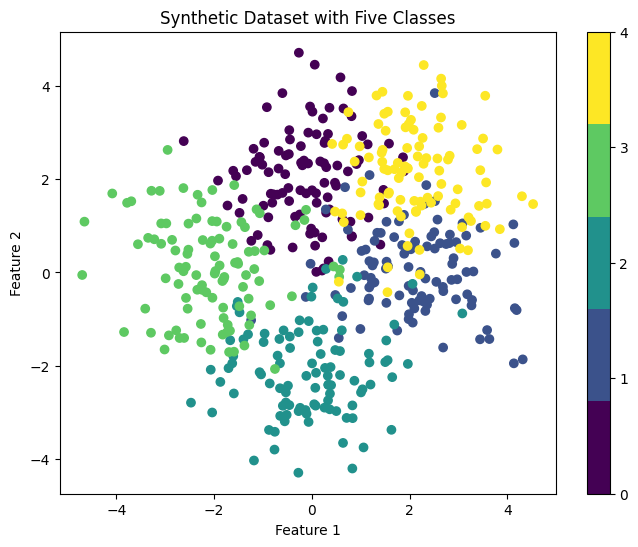

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import seaborn as sns
from sklearn.metrics import log_loss

# Set random seed for reproducibility
np.random.seed(42)

# Number of samples per class
num_samples_per_class = 100

# Generate data for each class
class_1 = np.random.randn(num_samples_per_class, 2) + np.array([0, 2])
class_2 = np.random.randn(num_samples_per_class, 2) + np.array([2, 0])
class_3 = np.random.randn(num_samples_per_class, 2) + np.array([0, -2])
class_4 = np.random.randn(num_samples_per_class, 2) + np.array([-2, 0])
class_5 = np.random.randn(num_samples_per_class, 2) + np.array([2, 2])

# Concatenate data from all classes
X = np.vstack([class_1, class_2, class_3, class_4, class_5])

# Generate labels for each class
y = np.array([0]*num_samples_per_class + [1]*num_samples_per_class +
             [2]*num_samples_per_class + [3]*num_samples_per_class +
             [4]*num_samples_per_class)

# Visualize the dataset
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.get_cmap('viridis', 5))
plt.colorbar(ticks=range(5))
plt.title('Synthetic Dataset with Five Classes')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

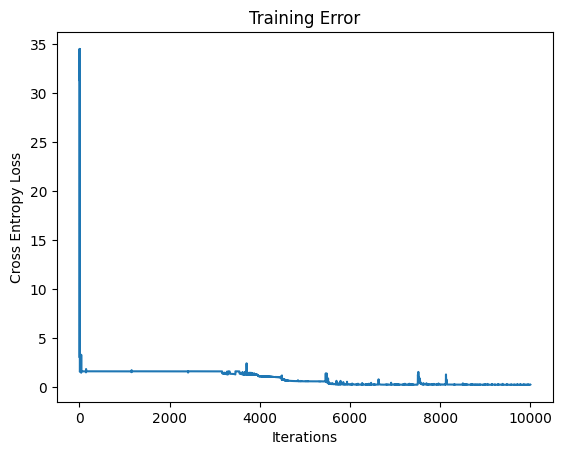


Evaluation Metrics:

Accuracy: 0.85

Precision: [1.         1.         0.86363636 0.95238095 0.57692308]

Recall: [0.85       0.7        0.9047619  0.95238095 0.83333333]

F1-score: [0.91891892 0.82352941 0.88372093 0.95238095 0.68181818]


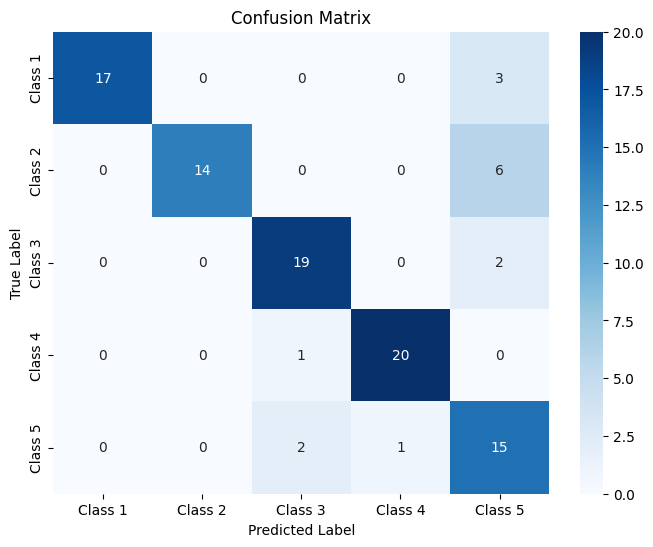

In [22]:
class NeuralNetwork(object):
    def __init__(self):
        # Defining the architecture of the neural network
        inputLayer = 2
        hiddenLayer1 = 10
        hiddenLayer2 = 10
        hiddenLayer3 = 10
        outLayer = 5  # Number of classes

        # Initializing the learning rate
        self.learning_rate = 0.2

        # Initializing weights with random values
        self.W_H1 = np.random.randn(inputLayer, hiddenLayer1)
        self.W_H2 = np.random.randn(hiddenLayer1, hiddenLayer2)
        self.W_H3 = np.random.randn(hiddenLayer2, hiddenLayer3)
        self.W_OH = np.random.randn(hiddenLayer3, outLayer)

    def softmax(self, x):
        # Softmax activation function to obtain class probabilities
        exp_vals = np.exp(x - np.max(x, axis=1, keepdims=True))
        return exp_vals / np.sum(exp_vals, axis=1, keepdims=True)

    def cross_entropy_loss(self, Y, pred):
        # Cross-entropy loss function to measure the difference between predicted and true class probabilities
        m = Y.shape[0]
        loss = -1/m * np.sum(Y * np.log(pred))
        return loss

    def sigmoid(self, x, der=False):
        # Sigmoid activation function for hidden layers
        if der == True:
            return x * (1-x)
        else:
            return 1 / (1 + np.exp(-x))

    def feedForward(self, X):
        # Feedforward propagation through the network
        # Calculating activations of hidden layers
        hidden_input1 = np.dot(X, self.W_H1)
        self.hidden_output1 = self.sigmoid(hidden_input1)

        hidden_input2 = np.dot(self.hidden_output1, self.W_H2)
        self.hidden_output2 = self.sigmoid(hidden_input2)

        hidden_input3 = np.dot(self.hidden_output2, self.W_H3)
        self.hidden_output3 = self.sigmoid(hidden_input3)

        # Calculating activations of output layer
        output_input = np.dot(self.hidden_output3, self.W_OH)
        pred = self.softmax(output_input)
        return pred

    def backPropagation(self, X, Y, pred):
        # Back propagation to update weights based on prediction error
        output_error = Y - pred
        output_delta = self.learning_rate * output_error

        hidden_error3 = output_delta.dot(self.W_OH.T) * self.sigmoid(self.hidden_output3, der=True)
        hidden_delta3 = self.learning_rate * hidden_error3

        hidden_error2 = hidden_delta3.dot(self.W_H3.T) * self.sigmoid(self.hidden_output2, der=True)
        hidden_delta2 = self.learning_rate * hidden_error2

        hidden_error1 = hidden_delta2.dot(self.W_H2.T) * self.sigmoid(self.hidden_output1, der=True)
        hidden_delta1 = self.learning_rate * hidden_error1

        # Updating weights
        self.W_H1 += X.T.dot(hidden_delta1)
        self.W_H2 += self.hidden_output1.T.dot(hidden_delta2)
        self.W_H3 += self.hidden_output2.T.dot(hidden_delta3)
        self.W_OH += self.hidden_output3.T.dot(output_delta)

    def train(self, X, Y, epochs=10000):
        # Training the neural network
        err = []
        for i in range(epochs):
            output = self.feedForward(X)
            # Calculating and storing the training error for each epoch
            err.append(self.cross_entropy_loss(Y, output))
            self.backPropagation(X, Y, output)
        return err

# Generating synthetic dataset
np.random.seed(0)

# Number of samples per class
num_samples_per_class = 100

# Generating input features
X = np.zeros((num_samples_per_class * 5, 2))
Y = np.zeros((num_samples_per_class * 5, 5))

# Class 1
X[:num_samples_per_class, :] = np.random.randn(num_samples_per_class, 2) + np.array([2, 2])
Y[:num_samples_per_class, 0] = 1

# Class 2
X[num_samples_per_class:2*num_samples_per_class, :] = np.random.randn(num_samples_per_class, 2) + np.array([2, -2])
Y[num_samples_per_class:2*num_samples_per_class, 1] = 1

# Class 3
X[2*num_samples_per_class:3*num_samples_per_class, :] = np.random.randn(num_samples_per_class, 2) + np.array([-2, 2])
Y[2*num_samples_per_class:3*num_samples_per_class, 2] = 1

# Class 4
X[3*num_samples_per_class:4*num_samples_per_class, :] = np.random.randn(num_samples_per_class, 2) + np.array([-2, -2])
Y[3*num_samples_per_class:4*num_samples_per_class, 3] = 1

# Class 5
X[4*num_samples_per_class:, :] = np.random.randn(num_samples_per_class, 2)
Y[4*num_samples_per_class:, 4] = 1

# Shuffling the dataset
permutation = np.random.permutation(X.shape[0])
X = X[permutation, :]
Y = Y[permutation, :]

# Splitting the dataset into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Initializing the neural network
NN = NeuralNetwork()

# Training the neural network
training_error = NN.train(X_train, Y_train)

# Plotting the training error
plt.plot(training_error)
plt.title('Training Error')
plt.xlabel('Iterations')
plt.ylabel('Cross Entropy Loss')
plt.savefig("NN-HW/training_error.jpg")
plt.show()

# Testing the neural network with testing data
predictions = NN.feedForward(X_test)

# Converting predictions to class labels
predicted_labels = np.argmax(predictions, axis=1)
true_labels = np.argmax(Y_test, axis=1)

# Calculating evaluation metrics
accuracy = accuracy_score(true_labels, predicted_labels)
precision = precision_score(true_labels, predicted_labels, average=None)
recall = recall_score(true_labels, predicted_labels, average=None)
f1 = f1_score(true_labels, predicted_labels, average=None)

# Printing evaluation metrics
print()
print("Evaluation Metrics:")
print()
print("Accuracy:", accuracy)
print()
print("Precision:", precision)
print()
print("Recall:", recall)
print()
print("F1-score:", f1)

# Plotting confusion matrix
cm = confusion_matrix(true_labels, predicted_labels)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Class 1", "Class 2", "Class 3", "Class 4", "Class 5"], yticklabels=["Class 1", "Class 2", "Class 3", "Class 4", "Class 5"])
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.savefig("NN-HW/confusion_matrix.jpg")
plt.show()